<a href="https://colab.research.google.com/github/csce585-mlsystems/CSCE585ProjectROI/blob/michelleBranch/Model_Training_Google_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



> Running experiments in ModelDevelopment Directory



Cloned the repository

In [ ]:
!git clone https://github.com/csce585-mlsystems/CSCE585ProjectROI

Cloning into 'CSCE585ProjectROI'...
remote: Enumerating objects: 563, done.
remote: Counting objects: 100% (259/259), done.
remote: Compressing objects: 100% (199/199), done.
remote: Total 563 (delta 107), reused 165 (delta 57), pack-reused 304 (from 1)
Receiving objects: 100% (563/563), 1.50 MiB | 11.27 MiB/s, done.
Resolving deltas: 100% (248/248), done.


After cloning, you might need to navigate into the repository's directory. Then, install any necessary Python packages. Often, these are listed in a `requirements.txt` file. You may need to check the repository's documentation for the exact file name or commands.

In [ ]:
# Repo directories
import os
os.chdir('CSCE585ProjectROI')


Here I'm uploading my dependencies

In [ ]:
!pip install reactpy reactpy-router flask llama-cpp-python TensorFlow

In [ ]:
import sys
print(sys.version)

3.12.12 (main, Oct 10 2025, 08:52:57) [GCC 11.4.0]


Verified that the notebook is running from python 3.12.12

Uploading Specific libaries

In [7]:
# Body of neccessary imports
import tensorflow as tf
import matplotlib
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np #<-- May be optional not sure as of 10/13/25.
# import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.utils import to_categorical, plot_model
from tensorflow.keras.datasets import mnist

Uploaded the model from local computer

In [8]:
from google.colab import files
model = files.upload()

Saving set1FinalCopy.py to set1FinalCopy.py


In [23]:
from google.colab import files
google = files.upload()

Saving google_Metrics.csv to google_Metrics.csv


Step 1: Split data into training group, validation and test sets

X : Features

y : Target variable of dataset

In [11]:
import numpy as np
import pandas as pd
import io
from sklearn.model_selection import train_test_split

In [25]:
import pandas as pd
import io

# Path to the google_Metrics.csv file in the cloned repository
file_path = 'google_Metrics.csv'

# Read the CSV directly from the file system
df_raw = pd.read_csv(file_path)

# Set the 'Metric' column as the index, then transpose the DataFrame
google = df_raw.set_index('Metric').T

# The index is now dates; optionally, reset it to make 'Date' a column
google.index.name = 'Date'
google = google.reset_index()

# Convert 'Date' column to datetime objects and sort
google['Date'] = pd.to_datetime(google['Date'])
google = google.sort_values(by='Date')

# Strip any potential whitespace from column names for easier access
google.columns = google.columns.str.strip()

print("Google DataFrame processed successfully from file system.")
# You may want to inspect apple.head() and apple.columns here to confirm the structure.

Google DataFrame processed successfully from file system.


In [27]:
# for fn in google.keys():
#   google = pd.read_csv(io.StringIO(google[fn].decode('utf-8')))

\Here I'm defining X and y values for the Google dataset where my metrics will be X values and dates will be y value

I extracted my feature columns

In [29]:
feature_columns = [
    "Operating Cash Flow",
    "Capital Expenditure",
    "Free Cash Flow",
    "Total Debt",
    "Common Stockholder Equity",
    "Total Liabilities Net Minority Interest",
    "Total Assets",
    "Shares Outstanding",
    "Net Income Common Stockholders",
    "Diluted Average Shares",
    "Diluted EPS"
]

# Extract X (features) and y (target 'Price') from the apple DataFrame
X_data = google[feature_columns]
y_data = google['Price']

print("Google Features (X_data) head:\n", X_data.head())
print("\nTarget (y_data) head:\n", y_data.head())

Google Features (X_data) head:
 Metric  Operating Cash Flow  Capital Expenditure  Free Cash Flow  Total Debt  \
4                26640000.0          -13186000.0      13454000.0  27801000.0   
3                30698000.0          -13061000.0      17637000.0  26922000.0   
2                39113000.0          -14276000.0      24837000.0  25461000.0   
1                36150000.0          -17197000.0      18953000.0  23564000.0   
0                27747000.0          -22446000.0       5301000.0  35559000.0   

Metric  Common Stockholder Equity  Total Liabilities Net Minority Interest  \
4                     300753000.0                              114017000.0   
3                     314119000.0                              116147000.0   
2                     325084000.0                              125172000.0   
1                     345267000.0                              130107000.0   
0                     362916000.0                              139137000.0   

Metric  Total Asse

In [30]:
from sklearn.model_selection import train_test_split

# Perform the train-test split on the actual data
X_train_data, X_test_data, y_train_data, y_test_data = train_test_split(X_data, y_data, test_size=0.25, random_state=42)

# Display the shapes to confirm
print("Shape of X_train_data:", X_train_data.shape)
print("Shape of y_train_data:", y_train_data.shape)
print("Shape of X_test_data:", X_test_data.shape)
print("Shape of y_test_data:", y_test_data.shape)

Shape of X_train_data: (3, 11)
Shape of y_train_data: (3,)
Shape of X_test_data: (2, 11)
Shape of y_test_data: (2,)


Lets map out our results in a nice graph

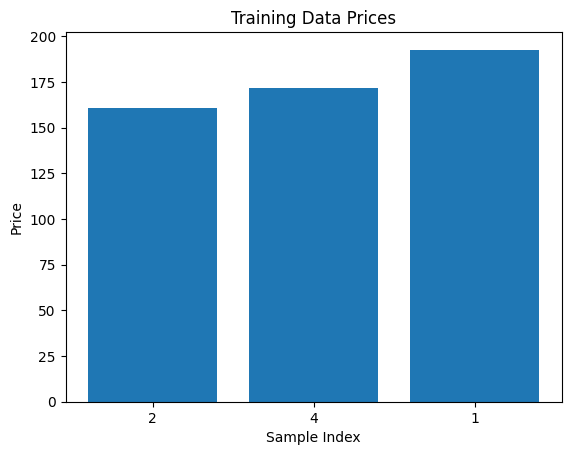

In [51]:
import matplotlib.pyplot as plt



# Use the index of y_train_data as x-axis labels for the bar plot
plt.bar(X_train_data.index.astype(str), y_train_data)
plt.xlabel("Sample Index")
plt.ylabel("Price")
plt.title("Training Data Prices")
plt.show()

Now I have to define my validation data which is 50% of combined dataset

In [56]:
from sklearn.model_selection import train_test_split

# Assuming X_data and y_data are the original full feature and target datasets
# Split into a temporary set (for train/test) and the validation set (50%)
X_temp, X_val, y_temp, y_val = train_test_split(X_data, y_data, test_size=0.5, random_state=42)

# Split the temporary set into training (25%) and test (25%)
X_train, X_test, y_train, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of X_val:", X_val.shape)
print("Shape of y_val:", y_val.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (1, 11)
Shape of y_train: (1,)
Shape of X_val: (3, 11)
Shape of y_val: (3,)
Shape of X_test: (1, 11)
Shape of y_test: (1,)


Lets map our validation data in a nice graph

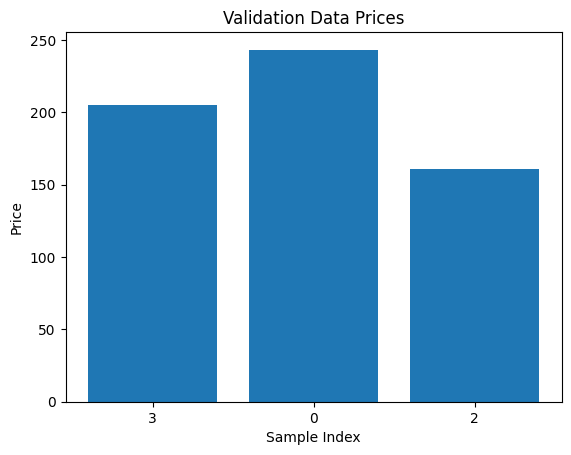

In [57]:
import matplotlib.pyplot as plt

# Use the index of y_val as x-axis labels for the bar plot
plt.bar(y_val.index.astype(str), y_val)
plt.xlabel("Sample Index")
plt.ylabel("Price")
plt.title("Validation Data Prices")
plt.show()

Apple Data

Training : X_train, y_train

Validation : X_main, y_main

Test : X_test, y_test

Step 2: Use data leakage prevention techniques such as walk forward cross validation

Update I'm going to go with standard walk forward validation since the current dataset we have is small

In [59]:
import pandas as pd
from sklearn.model_selection import TimeSeriesSplit
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [71]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

def perform_walk_forward_validation(X, y, training_window_size, testing_window_size):
    errors = []
    predictions = []

    # Ensure X and y are properly aligned by index
    # For time series, this usually means sorting by date/index
    # Assuming X and y are already sorted by Date/Index due to previous steps

    # The loop should iterate over the points where a test set can begin
    # The last possible start for a test window is such that the entire testing_window can be formed.
    # The last possible start for a training window is len(X) - testing_window_size - training_window_size

    # Adjusted range to be suitable for small datasets and the logic below
    # The loop iterates through the dataset, moving the start of the training window
    # 'i' represents the *end* index of the current training window slice
    for i in range(training_window_size, len(X) - testing_window_size + 1):
        # Define training and testing windows
        X_train_window = X.iloc[i - training_window_size : i]
        y_train_window = y.iloc[i - training_window_size : i]

        X_test_window = X.iloc[i : i + testing_window_size]
        y_test_window = y.iloc[i : i + testing_window_size]

        # Handle cases where windows might be empty (e.g., at the very start/end with small data)
        if X_train_window.empty or X_test_window.empty or y_train_window.empty or y_test_window.empty:
            continue

        # Train the model
        model = LinearRegression()
        model.fit(X_train_window, y_train_window)

        # Make predictions
        y_pred = model.predict(X_test_window)

        # Evaluate and store results
        # Ensure y_test_window and y_pred have compatible shapes/types for MSE
        mse = mean_squared_error(y_test_window, y_pred)
        errors.append(mse)
        predictions.extend(y_pred)

    return errors, predictions

# Adjust window sizes for the current small dataset (X_data and y_data have 5 rows)
# For demonstration, we'll pick values that allow at least one iteration.
# Example: if total data points = 5
# training_window_size = 2
# testing_window_size = 1
# range becomes range(2, 5 - 1 + 1) = range(2, 5)
# Iterations for i = 2, 3, 4

training_window = 2  # Use 2 data points for training
testing_window = 1   # Predict for the next 1 data point

# Call the function with X_data and y_data from the apple dataset
errors, predictions = perform_walk_forward_validation(X_data, y_data, training_window, testing_window)

print(f"Mean Squared Errors for each fold: {errors}")
print(f"Average MSE: {sum(errors) / len(errors) if errors else 'N/A'}")

Mean Squared Errors for each fold: [6856.300233959592, 5683.117399745686, 409.9760598490104]
Average MSE: 4316.464564518096


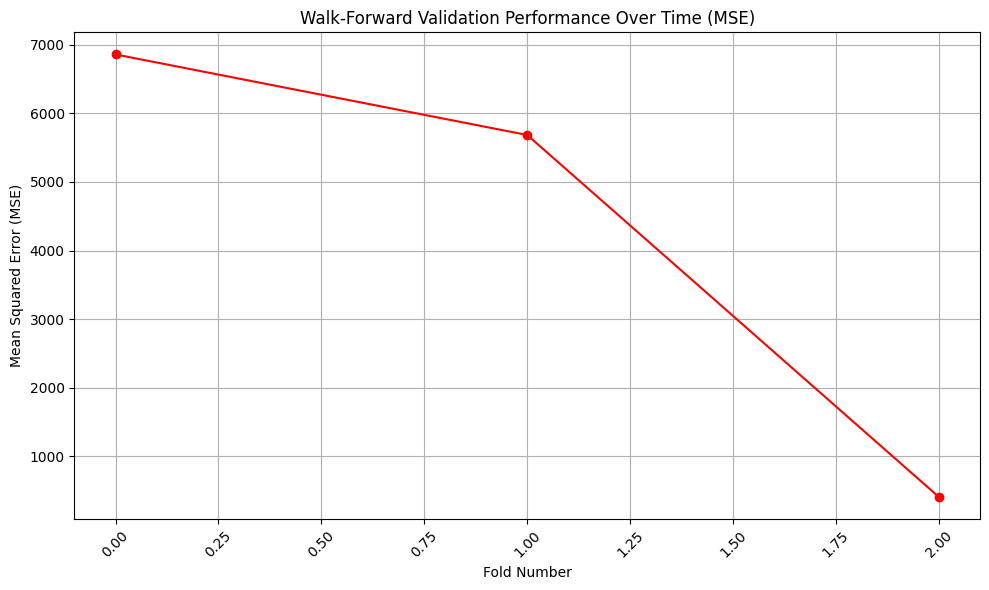

In [73]:
import matplotlib.pyplot as plt

# Plotting walk-forward validation performance
plt.figure(figsize=(10, 6))
plt.plot(range(len(errors)), errors, marker='o', linestyle='-', color='red')
plt.title('Walk-Forward Validation Performance Over Time (MSE)')
plt.xlabel('Fold Number')
plt.ylabel('Mean Squared Error (MSE)')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Step 3: Hypertune the parameters using the validation data set

I'm going to use the random search technique since we are working with financial stock data

In [41]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Ridge

# Create a pipeline with scaling and the linear model
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('linear_model', Ridge()) # Or Lasso, etc.
])


In [42]:
from scipy.stats import uniform, loguniform
from sklearn.linear_model import Ridge

# Define the search space
param_distributions = {
    'linear_model__alpha': loguniform(1e-4, 1e3), # Example for Ridge
    # Add other parameters for other models as needed
}


In [43]:
from sklearn.model_selection import RandomizedSearchCV

# Initialize the RandomizedSearchCV object
random_search = RandomizedSearchCV(
    pipeline,
    param_distributions=param_distributions,
    n_iter=100, # Number of random combinations to try
    cv=3, # Number of cross-validation folds, changed from 5 to 3
    scoring='neg_mean_squared_error', # Or other scoring metrics
    random_state=42,
    n_jobs=-1 # Use all available CPU cores
)

# Fit the search object to your training data using the correct variables
random_search.fit(X_train_data, y_train_data)


RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                             ('linear_model', Ridge())]),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'linear_model__alpha': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7da6f5fef560>},
                   random_state=42, scoring='neg_mean_squared_error')

Since we are measuring numerical values it would be best to use regression based evaluations such as MSE

In [ ]:
import yfinance as yf
from datetime import timedelta

Fetch yfinance data then pass it thru the fucntion fetch market data so it can make future predicitions

In [ ]:
pip install yfinance

In [44]:
import yfinance as yf

# Define the ticker symbol
ticker_symbol = "GOOG" #regular non class share rights

# Create a Ticker object
ticker = yf.Ticker(ticker_symbol)

# Fetch historical market data
historical_data = ticker.history(period="1y")  # data for the last year
print("Historical Data:")
print(historical_data)

# Fetch basic financials
financials = ticker.financials.dropna()
print("\nFinancials:")
print(financials)

# Fetch stock actions like dividends and splits
actions = ticker.actions.dropna()
print("\nStock Actions:")
print(actions)

Historical Data:
                                 Open        High         Low       Close  \
Date                                                                        
2024-12-03 00:00:00-05:00  172.365607  173.560390  171.758265  172.266052   
2024-12-04 00:00:00-05:00  172.027089  175.661177  171.997220  175.322662   
2024-12-05 00:00:00-05:00  176.547324  176.935624  173.251735  173.550430   
2024-12-06 00:00:00-05:00  173.122320  176.068426  172.793756  175.720947   
2024-12-09 00:00:00-05:00  175.147766  177.465258  174.833781  176.528305   
...                               ...         ...         ...         ...   
2025-11-26 00:00:00-05:00  320.779999  324.989990  317.200012  320.279999   
2025-11-28 00:00:00-05:00  323.429993  326.880005  316.940002  320.119995   
2025-12-01 00:00:00-05:00  317.475006  319.630005  313.980011  315.119995   
2025-12-02 00:00:00-05:00  316.899994  318.600006  314.220001  316.019989   
2025-12-03 00:00:00-05:00  316.059998  321.329987  314.2799

Lets plot out yfinace data

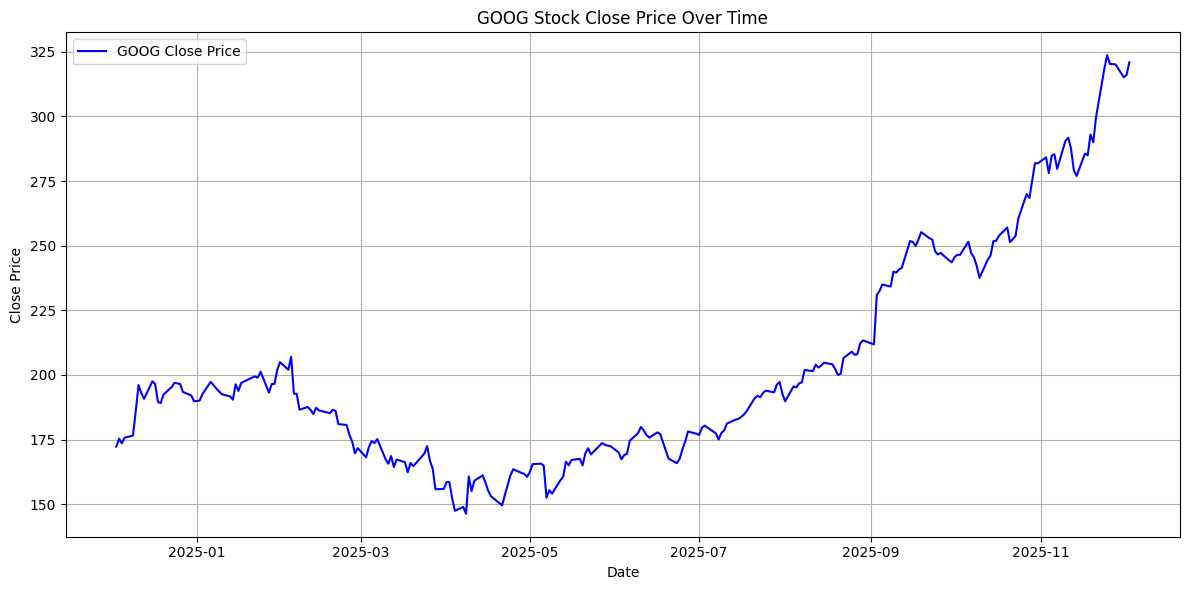

In [76]:
import matplotlib.pyplot as plt

# Plotting the 'Close' price from historical_data
# Convert the index to be timezone-naive for easier plotting with matplotlib
plt.figure(figsize=(12, 6))
plt.plot(historical_data.index.tz_localize(None), historical_data['Close'], label='GOOG Close Price', color='blue')
plt.title('GOOG Stock Close Price Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()
